In [282]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Some useful functions

In [283]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])
    
# 相関係数が高い順に並んだseriesを作ってくれる関数

In [284]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

#　目的変数との相関係数が高い順に左から並んだヒートマップを作成する関数

In [285]:
target = 'SalePrice_Log'

load data

In [286]:
train = pd.read_csv('../house price/train.csv')
test = pd.read_csv('../house price/test.csv')

In [287]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [288]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [289]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## SalePrice

skewness: 1.882876
kurtosis; 6.536282


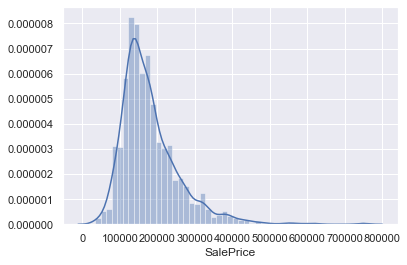

In [290]:
sns.distplot(train['SalePrice'])

print('skewness: %f' % train['SalePrice'].skew())
print('kurtosis; %f' % train['SalePrice'].kurt())

skew : 歪度（わいど）。データの左右の偏りを表す。正規分布は0である。左に偏るとプラスの値をとる

kurt : 尖度（せんど）。データがどれだけとがっているかを表す正規分布は0である。とがっている（平均値付近に集まっている）とプラスの値をとる。

https://bellcurve.jp/statistics/course/17950.html

skewness: 0.121335
kurtosis; 0.809532


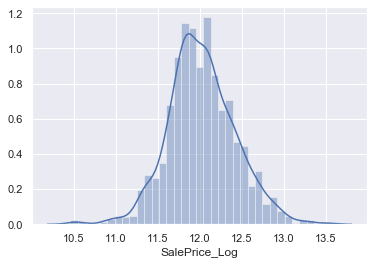

In [291]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice_Log']);

print('skewness: %f' % train['SalePrice_Log'].skew())
print('kurtosis; %f' % train['SalePrice_Log'].kurt())

train.drop('SalePrice', axis=1, inplace=True)

# ログを取ってみると正規分布っぽくなるんだね

## 数値変数と目的変数

In [292]:
num_f = train.dtypes[train.dtypes != 'object'].index
cat_f = train.dtypes[train.dtypes == 'object'].index

In [293]:
train[num_f].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')

In [294]:
train[cat_f].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 欠損値

In [295]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [296]:
for col in missing_data.index[0:19]:
    if col in cat_f:
        train[col].fillna('None', inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)

In [297]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False)
missing_test = pd.concat([total, percent],axis=1, keys=['Total', 'Percent'])
missing_test.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [298]:
for col in missing_test.index[0:19]:
    if col in cat_f:
        test[col].fillna('None', inplace=True)
    else:
        test[col].fillna(test[col].mean(), inplace=True)

## 対数変換

In [299]:
for col in num_f:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(train[col].skew()),
          '  ',
          'Kurtosis: {:06.2f}'.format(train[col].kurt()))

Id              Skewness: 00.00    Kurtosis: -01.20
MSSubClass      Skewness: 01.41    Kurtosis: 001.58
LotFrontage     Skewness: 02.38    Kurtosis: 021.85
LotArea         Skewness: 12.21    Kurtosis: 203.24
OverallQual     Skewness: 00.22    Kurtosis: 000.10
OverallCond     Skewness: 00.69    Kurtosis: 001.11
YearBuilt       Skewness: -0.61    Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50    Kurtosis: -01.27
MasVnrArea      Skewness: 02.68    Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69    Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26    Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92    Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52    Kurtosis: 013.25
1stFlrSF        Skewness: 01.38    Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81    Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01    Kurtosis: 083.23
GrLivArea       Skewness: 01.37    Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60    Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10    Kurtosis: 016.40
FullBath    

Skewness: 1.366560
Kurtosis: 4.895121


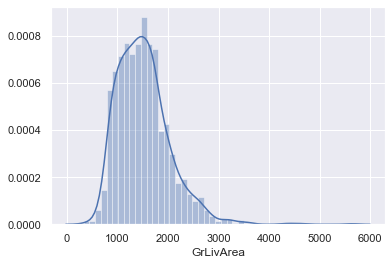

In [300]:
sns.distplot(train['GrLivArea']);

print("Skewness: %f" % train['GrLivArea'].skew())
print("Kurtosis: %f" % train['GrLivArea'].kurt())

Skewness: 12.207688
Kurtosis: 203.243271


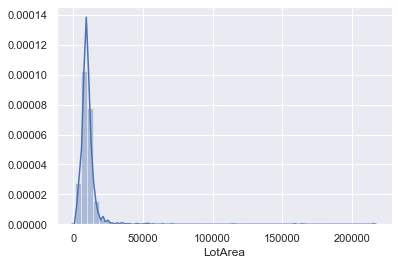

In [301]:
sns.distplot(train['LotArea']);
#skewness and kurtosis
print("Skewness: %f" % train['LotArea'].skew())
print("Kurtosis: %f" % train['LotArea'].kurt())

In [302]:
for df in [train, test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace=True, axis=1)
    
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace=True, axis=1)
    
num_f = train.dtypes[train.dtypes != 'object'].index

Skewness: -0.006995
Kurtosis: 0.282603


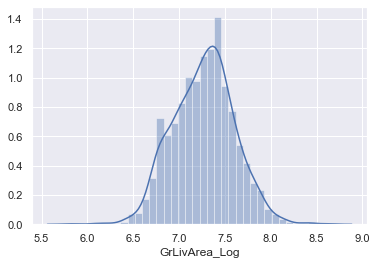

In [303]:
sns.distplot(train['GrLivArea_Log']);

print("Skewness: %f" % train['GrLivArea_Log'].skew())
print("Kurtosis: %f" % train['GrLivArea_Log'].kurt())

Skewness: -0.137994
Kurtosis: 4.713358


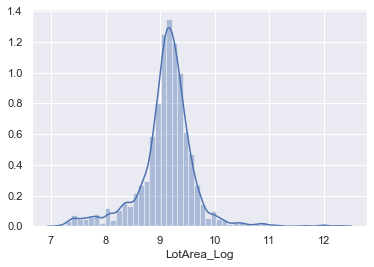

In [304]:
sns.distplot(train['LotArea_Log']);
#skewness and kurtosis
print("Skewness: %f" % train['LotArea_Log'].skew())
print("Kurtosis: %f" % train['LotArea_Log'].kurt())

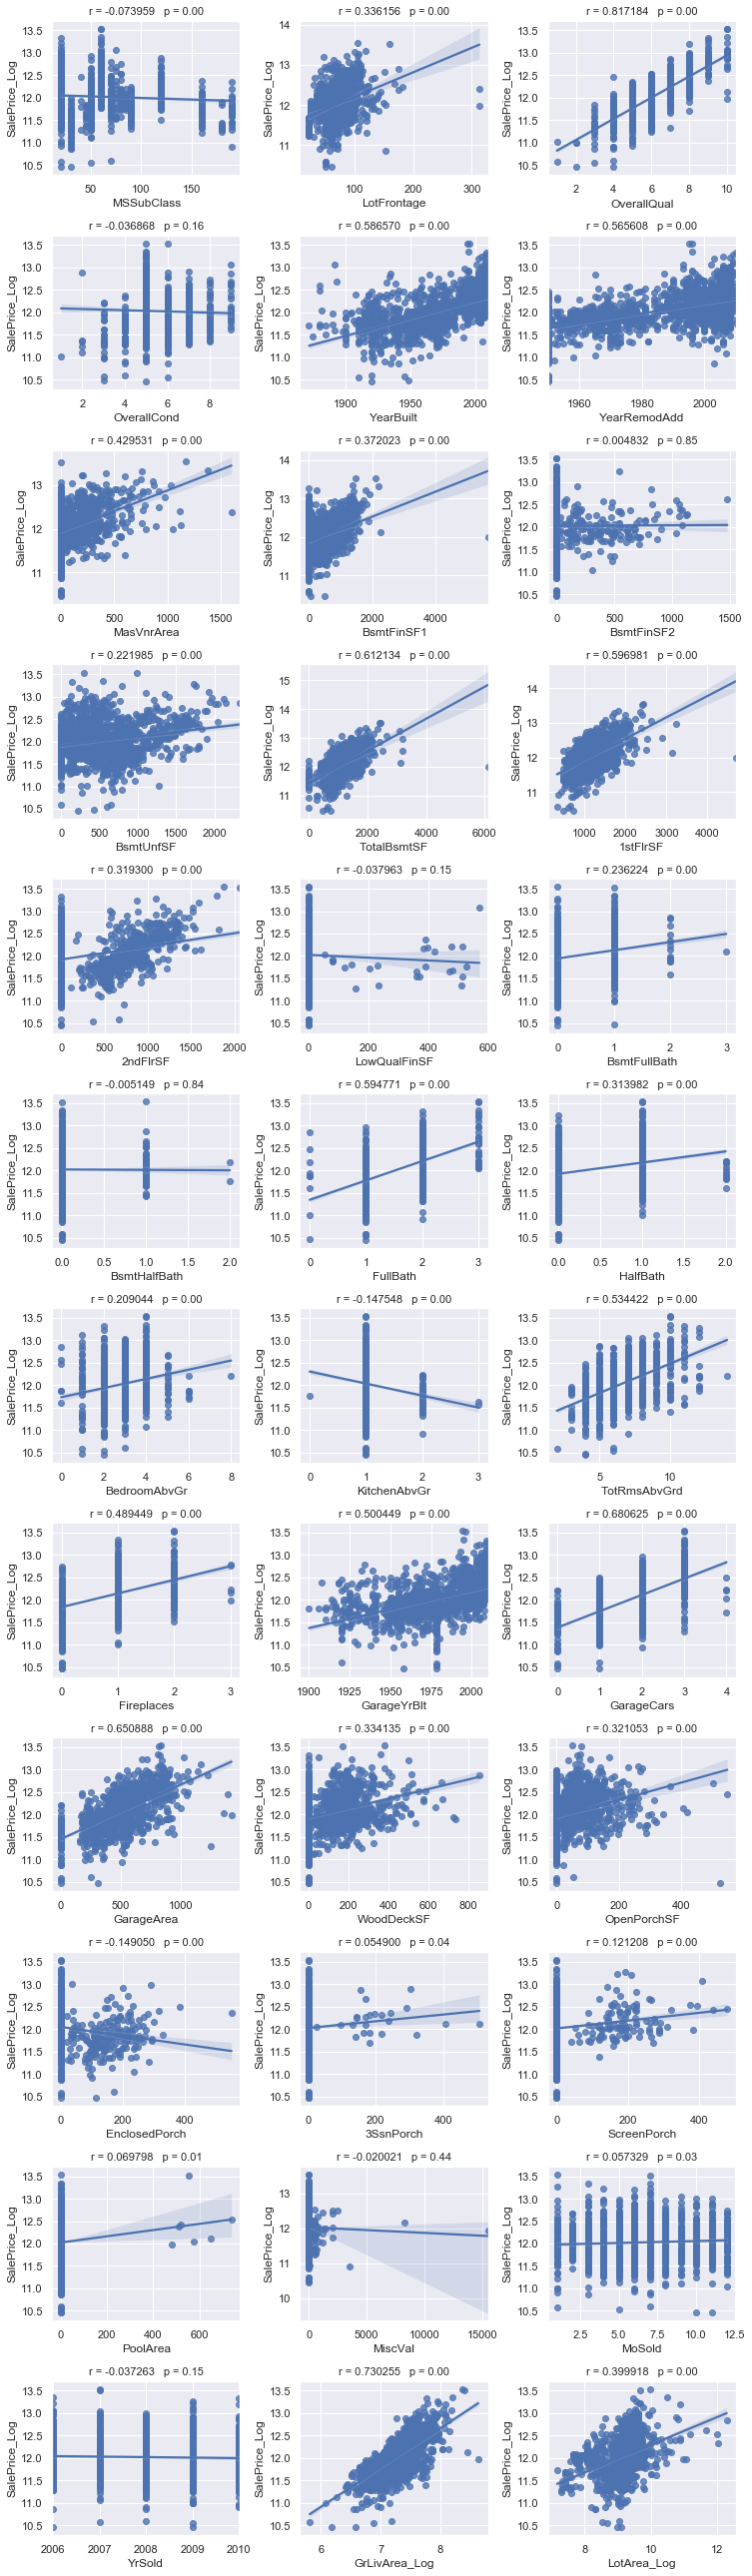

In [305]:
nr_rows = 12
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

li_num_f = list(num_f)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in li_num_f if c not in li_not_plot]

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols + c
        if i < len(li_plot_num_feats):
            sns.regplot(train[li_plot_num_feats[i]], train[target], ax = axs[r][c])
            stp = stats.pearsonr(train[li_plot_num_feats[i]], train[target]) # 相関係数とｐ値を返してくれるらしい
            str_title = 'r = '+ '{0:2f}'.format(stp[0]) + '   ' + 'p = '+ '{0:.2f}'.format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()
plt.show()

## 外れ値除去

In [306]:
train = train.drop(
    train[(train['OverallQual']==10) & (train['SalePrice_Log']<12.3)].index)

In [307]:
train = train.drop(
    train[(train['GrLivArea_Log']>8.3) & (train['SalePrice_Log']<12.5)].index)

相関の強い説明変数のリストを作る

In [308]:
corr = train.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_f)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.4].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.4].index)

List of numerical features with r above min_val_corr :
['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea_Log']
******************************
List of numerical features with r below min_val_corr :
['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


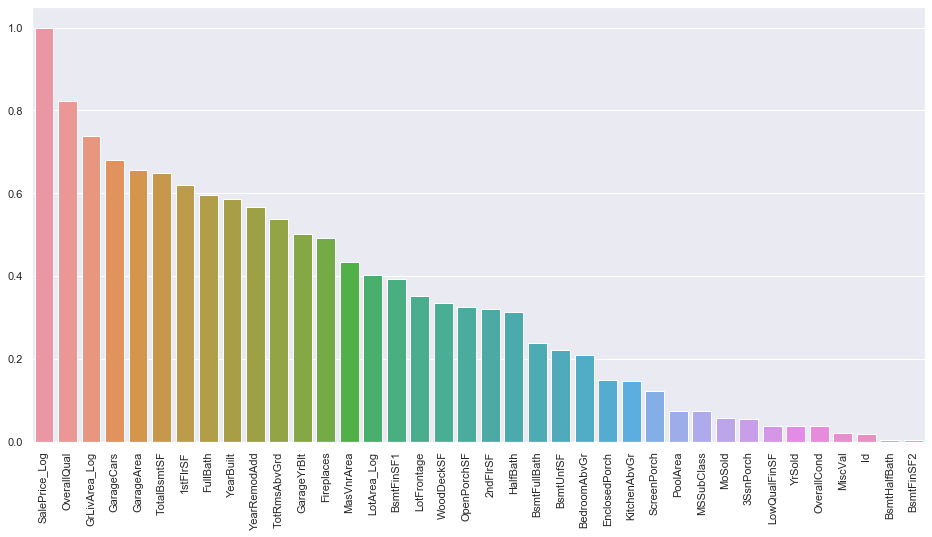

In [309]:
plt.figure(figsize=(16,8))
sns.barplot(x=ser_corr.index,y=ser_corr.values)
plt.xticks(rotation=90)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

## カテゴリ変数の中身を見ていく

In [310]:
for catg in list(cat_f) :
    print(train[catg].value_counts())
    print('#'*50)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1452
Grvl       6
Name: Street, dtype: int64
##################################################
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

### 説明変数との関係

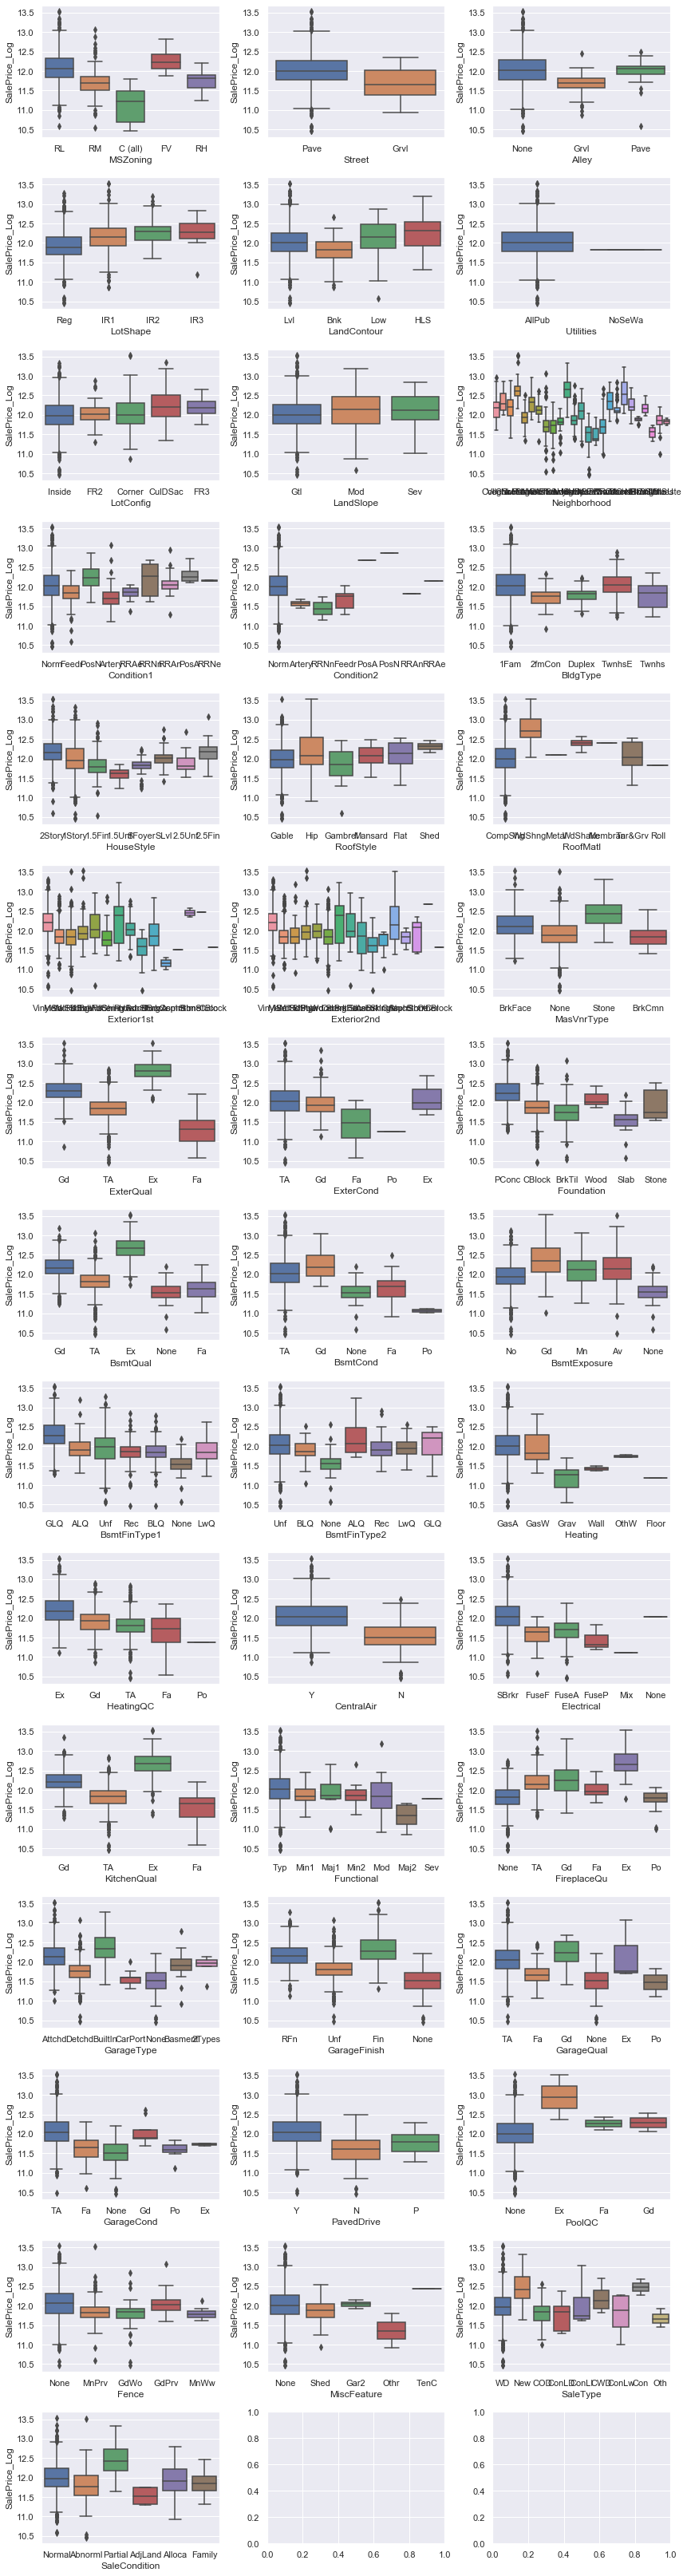

In [311]:
li_cat_feats = list(cat_f)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

In [312]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

## 相関行列

In [313]:
nr_feats = len(cols_abv_corr_limit)

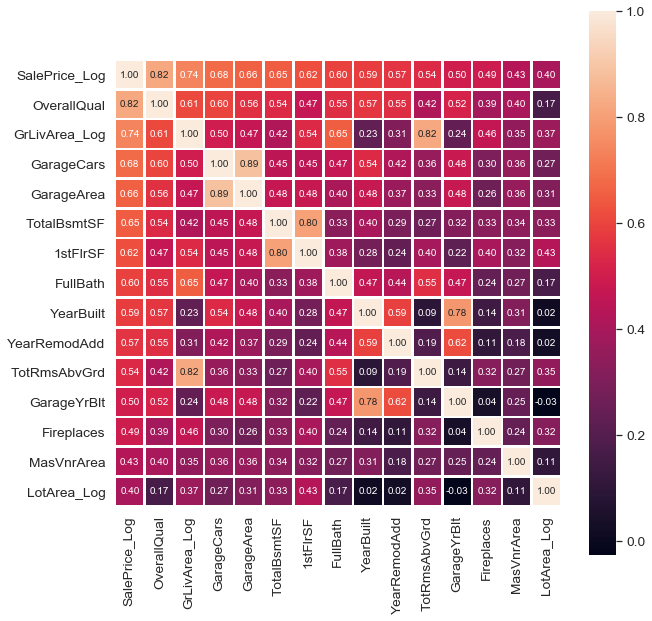

In [314]:
plot_corr_matrix(train, nr_feats, target)

In [319]:
train.to_csv('train1.csv')
test.to_csv('test1.csv')

# データラングリング

In [320]:
train = pd.read_csv('../house price/train1.csv')
test = pd.read_csv('../house price/test1.csv')

In [321]:
id_test = test['Id']

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

train = train_a.drop(cols_to_drop, axis=1)
test = test_a.drop(cols_to_drop, axis=1)

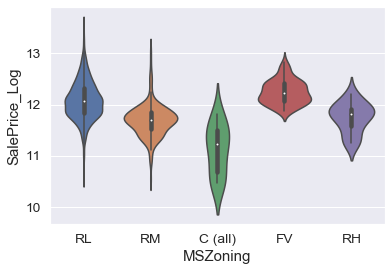

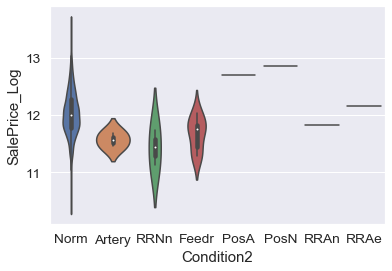

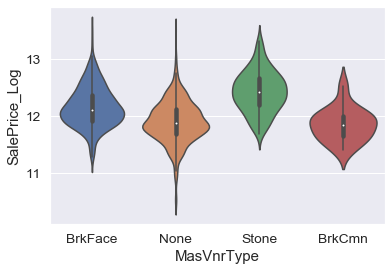

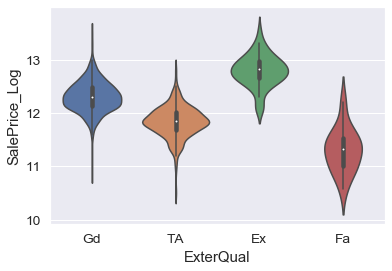

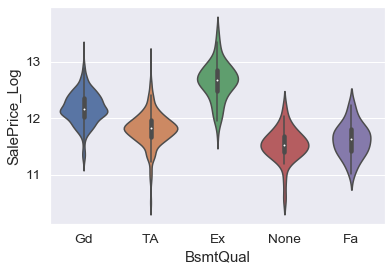

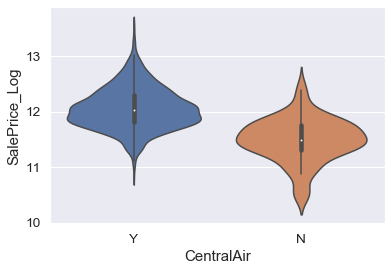

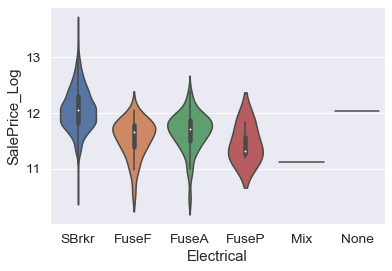

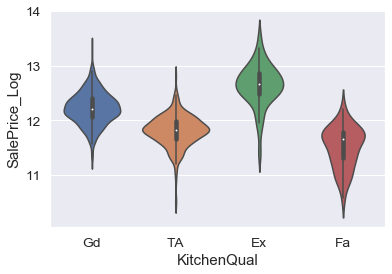

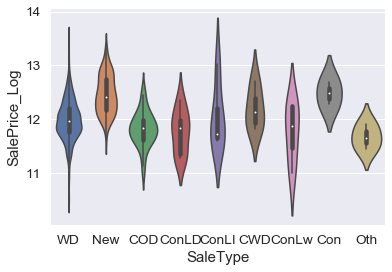

In [322]:
cat_list = catg_strong_corr.copy()
cat_list.remove('Neighborhood')

for cat in cat_list:
    sns.violinplot(x=cat, y=target, data=train)
    plt.show()

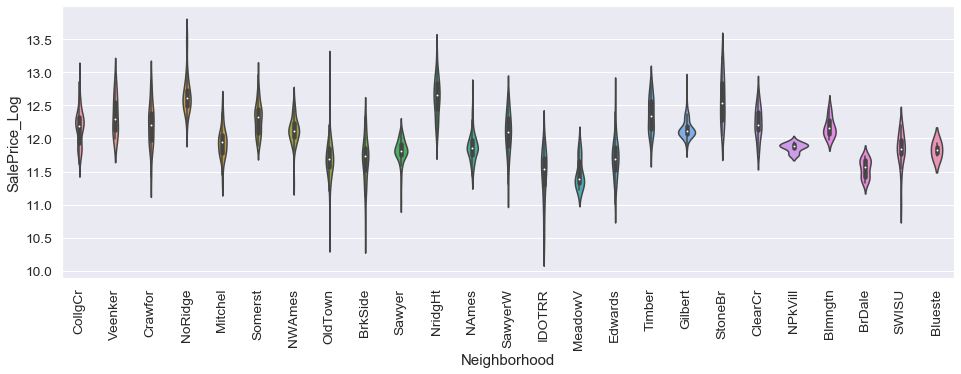

In [323]:
plt.figure(figsize=(16,5))
sns.violinplot(x='Neighborhood', y=target, data=train)
plt.xticks(rotation=90)
plt.show()

In [324]:
for catg in cat_list :
    g = train.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.645425
F

In [325]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [334]:
for df in [train, test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  


KeyError: 'Neighborhood'

C:\Users\user\Anaconda\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


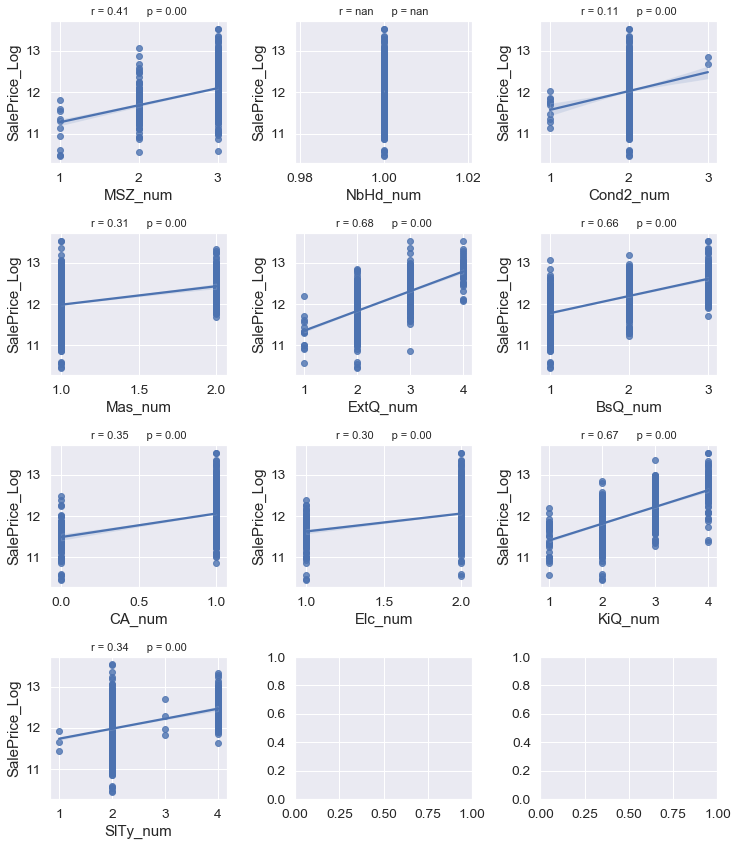

In [335]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(train[new_col_num[i]], train[target], ax = axs[r][c])
            stp = stats.pearsonr(train[new_col_num[i]], train[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

### 上記に変更したカテゴリ変数の元のほうは削除
そのうえで、相関係数順に並べる

In [347]:
def corr_barplot(df, features, target_col):
    corr = df.corr()
    corr_abs = corr.abs()

    cols = len(features)
    ser_corr1 = corr_abs.nlargest(cols, target_col)[target_col]


    plt.figure(figsize=(16,8))
    sns.barplot(x=ser_corr1.index,y=ser_corr1.values)
    plt.xticks(rotation=90)
    plt.show()

    return ser_corr1

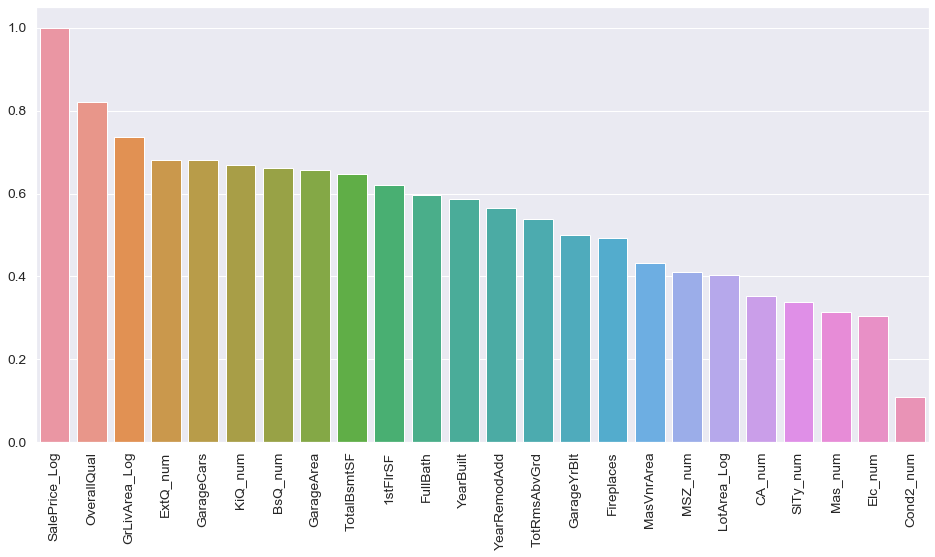

NameError: name 'ser_corr1' is not defined

In [346]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr_barplot(train, train.columns, target)


for df in [train, test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1) 

In [354]:
d_cols = ['CA_num', 'SlTy_num', 'Mas_num', 'Elc_num', 'Cond2_num']

In [350]:
train

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,RL,7,2003,2003,196.0,856,856,2,8,0,2003.0,2,548,12.247694,7.444249,9.041922,3,1,2,1,3,2,1,2,3,2
1,RL,6,1976,1976,0.0,1262,1262,2,6,1,1976.0,2,460,12.109011,7.140453,9.169518,3,1,2,1,2,2,1,2,2,2
2,RL,7,2001,2002,162.0,920,920,2,6,1,2001.0,2,608,12.317167,7.487734,9.328123,3,1,2,1,3,2,1,2,3,2
3,RL,7,1915,1970,0.0,756,961,1,7,1,1998.0,3,642,11.849398,7.448334,9.164296,3,1,2,1,2,1,1,2,3,2
4,RL,8,2000,2000,350.0,1145,1145,2,9,1,2000.0,3,836,12.429216,7.695303,9.565214,3,1,2,1,3,2,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,6,1999,2000,0.0,953,953,2,7,1,1999.0,2,460,12.072541,7.406711,8.976768,3,1,2,1,2,2,1,2,2,2
1456,RL,6,1978,1988,119.0,1542,2073,2,7,2,1978.0,2,500,12.254863,7.636752,9.486076,3,1,2,2,2,2,1,2,2,2
1457,RL,7,1941,2006,0.0,1152,1188,2,9,2,1941.0,1,252,12.493130,7.757906,9.109636,3,1,2,1,4,1,1,2,3,2
1458,RL,5,1950,1996,0.0,1078,1078,1,5,0,1950.0,1,240,11.864462,6.982863,9.181632,3,1,2,1,2,1,1,1,3,2


In [351]:
test

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,RH,NAmes,Norm,5,1961,1961,None,0.0,TA,TA,882.0,Y,SBrkr,896,1,TA,5,0,1961.000000,1.0,730.0,WD,6.797940,9.360655,2,1,2,1,2,1,1,2,2,2
1,RL,NAmes,Norm,6,1958,1958,BrkFace,108.0,TA,TA,1329.0,Y,SBrkr,1329,1,Gd,6,0,1958.000000,1.0,312.0,WD,7.192182,9.565704,3,1,2,1,2,1,1,2,3,2
2,RL,Gilbert,Norm,5,1997,1998,None,0.0,TA,Gd,928.0,Y,SBrkr,928,2,TA,6,1,1997.000000,2.0,482.0,WD,7.395722,9.534595,3,2,2,1,2,2,1,2,2,2
3,RL,Gilbert,Norm,6,1998,1998,BrkFace,20.0,TA,TA,926.0,Y,SBrkr,926,2,Gd,7,1,1998.000000,2.0,470.0,WD,7.380256,9.208138,3,2,2,1,2,1,1,2,3,2
4,RL,StoneBr,Norm,8,1992,1992,None,0.0,Gd,Gd,1280.0,Y,SBrkr,1280,2,Gd,5,0,1992.000000,2.0,506.0,WD,7.154615,8.518193,3,3,2,1,3,2,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,MeadowV,Norm,4,1970,1970,None,0.0,TA,TA,546.0,Y,SBrkr,546,1,TA,5,0,1977.721217,0.0,0.0,WD,6.995766,7.568379,2,1,2,1,2,1,1,2,2,2
1455,RM,MeadowV,Norm,4,1970,1970,None,0.0,TA,TA,546.0,Y,SBrkr,546,1,TA,6,0,1970.000000,1.0,286.0,WD,6.995766,7.546446,2,1,2,1,2,1,1,2,2,2
1456,RL,Mitchel,Norm,5,1960,1996,None,0.0,TA,TA,1224.0,Y,SBrkr,1224,1,TA,7,1,1960.000000,2.0,576.0,WD,7.109879,9.903488,3,1,2,1,2,1,1,2,2,2
1457,RL,Mitchel,Norm,5,1992,1992,None,0.0,TA,Gd,912.0,Y,SBrkr,970,1,TA,6,0,1977.721217,0.0,0.0,WD,6.877296,9.253496,3,1,2,1,2,2,1,2,2,2


In [352]:
test.drop(catg_cols_to_drop, inplace=True, axis=1)

In [353]:
test

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,RH,5,1961,1961,0.0,882.0,896,1,5,0,1961.000000,1.0,730.0,6.797940,9.360655,2,1,2,1,2,1,1,2,2,2
1,RL,6,1958,1958,108.0,1329.0,1329,1,6,0,1958.000000,1.0,312.0,7.192182,9.565704,3,1,2,1,2,1,1,2,3,2
2,RL,5,1997,1998,0.0,928.0,928,2,6,1,1997.000000,2.0,482.0,7.395722,9.534595,3,2,2,1,2,2,1,2,2,2
3,RL,6,1998,1998,20.0,926.0,926,2,7,1,1998.000000,2.0,470.0,7.380256,9.208138,3,2,2,1,2,1,1,2,3,2
4,RL,8,1992,1992,0.0,1280.0,1280,2,5,0,1992.000000,2.0,506.0,7.154615,8.518193,3,3,2,1,3,2,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,4,1970,1970,0.0,546.0,546,1,5,0,1977.721217,0.0,0.0,6.995766,7.568379,2,1,2,1,2,1,1,2,2,2
1455,RM,4,1970,1970,0.0,546.0,546,1,6,0,1970.000000,1.0,286.0,6.995766,7.546446,2,1,2,1,2,1,1,2,2,2
1456,RL,5,1960,1996,0.0,1224.0,1224,1,7,1,1960.000000,2.0,576.0,7.109879,9.903488,3,1,2,1,2,1,1,2,2,2
1457,RL,5,1992,1992,0.0,912.0,970,1,6,0,1977.721217,0.0,0.0,6.877296,9.253496,3,1,2,1,2,2,1,2,2,2


In [355]:
train.drop(d_cols, inplace=True, axis=1)
test.drop(d_cols, inplace=True, axis=1)

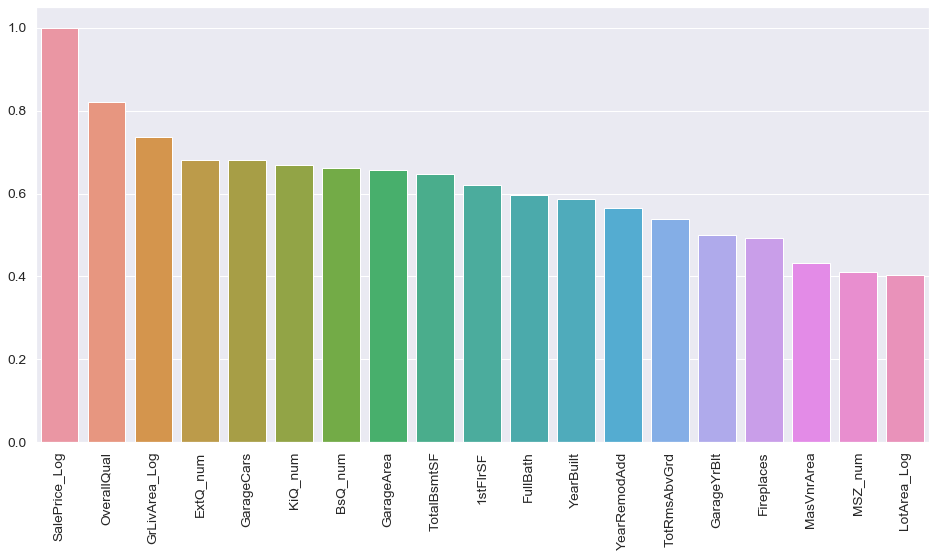

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64

In [356]:
corr_barplot(train, train.columns, target)

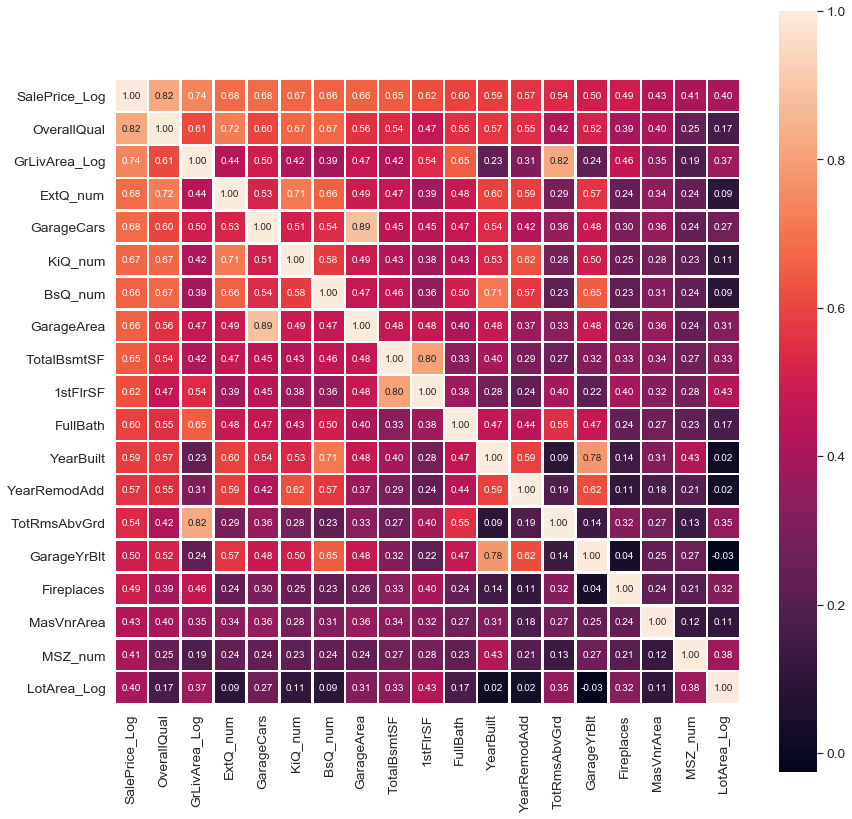

In [358]:
nr_feats=len(train.columns)
plot_corr_matrix(train, nr_feats, target)